In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import plotly.express as px

In [2]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [3]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 7.3 MB/s eta 0:00:00


In [4]:
import shap

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
x_train_hybrid = pd.read_csv('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/x_train_hybrid.csv')
y_train_hybrid = pd.read_csv('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/y_train_hybrid.csv')

x_test_hybrid = pd.read_csv('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/x_test_hybrid.csv')
y_test_hybrid = pd.read_csv('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/y_test_hybrid.csv')

In [7]:
y_test = y_test_hybrid["NObeyesdad"]
y_train = y_train_hybrid["NObeyesdad"]

Random Forest Weighted

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


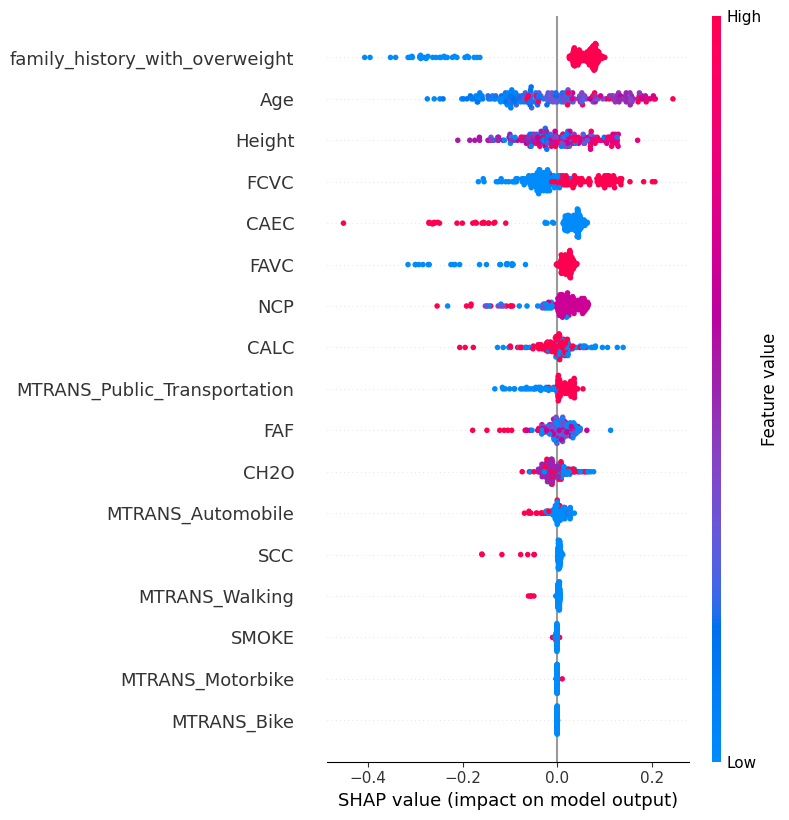

In [ ]:
# split your data into training and test sets
# train your Random Forest model
rf_model = RandomForestClassifier(random_state = 25,
                                  class_weight = 'balanced_subsample').fit(x_train_hybrid, y_train)

# create an explainer object
explainer = shap.TreeExplainer(rf_model)

# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test_hybrid.shape[0], size=200, replace=False)
x_test_sample = x_test_hybrid.iloc[sample_indices]

# calculate the shap values for the sample
shap_values = explainer.shap_values(x_test_sample)

# plot the shap summary plot
shap.summary_plot(shap_values[1], x_test_sample)

Permutation explainer: 201it [01:53,  1.62it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


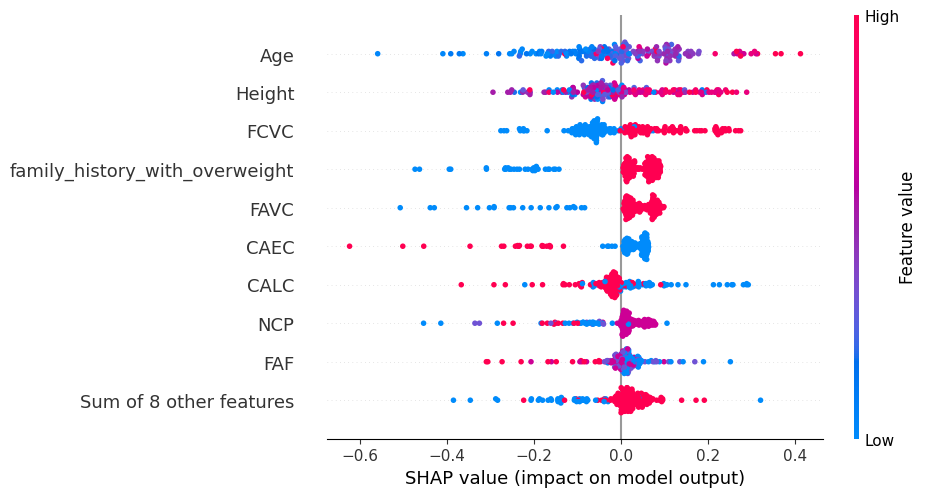

In [ ]:
# sv = Shapley Value
# exp = explainer
explainer = shap.Explainer(rf_model.predict, x_test_sample)
sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

Balanced Random Forest

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
`sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
`sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path

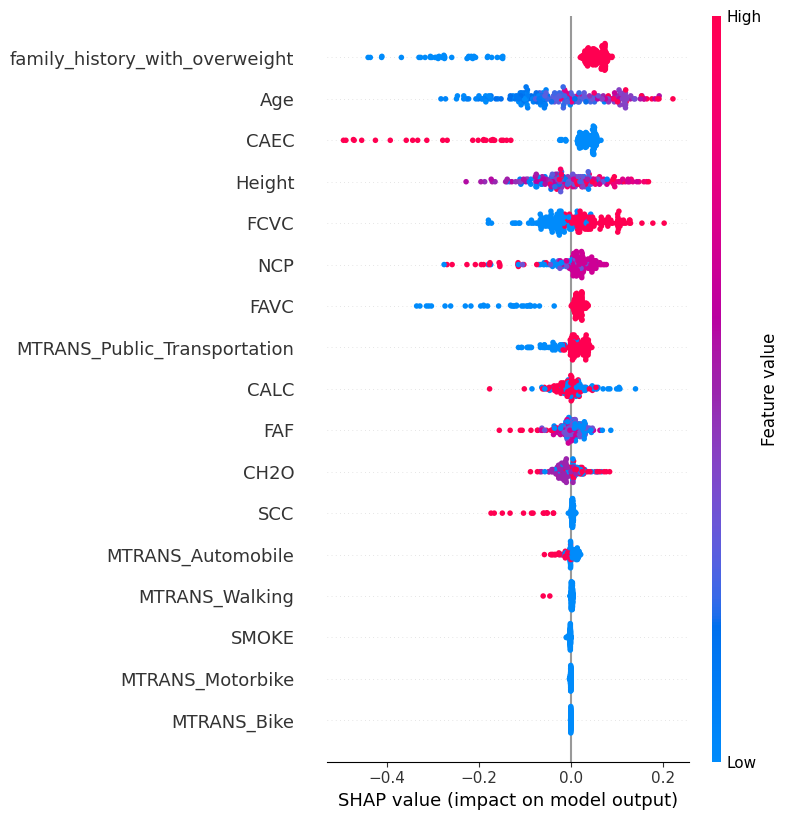

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=25)
brf.fit(x_train_hybrid, y_train_hybrid)

# create an explainer object
explainer = shap.TreeExplainer(brf)

# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test_hybrid.shape[0], size=200, replace=False)
x_test_sample = x_test_hybrid.iloc[sample_indices]

# calculate the shap values for the sample
shap_values = explainer.shap_values(x_test_sample)

# plot the shap summary plot
shap.summary_plot(shap_values[1], x_test_sample)


Permutation explainer: 201it [02:18,  1.42it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


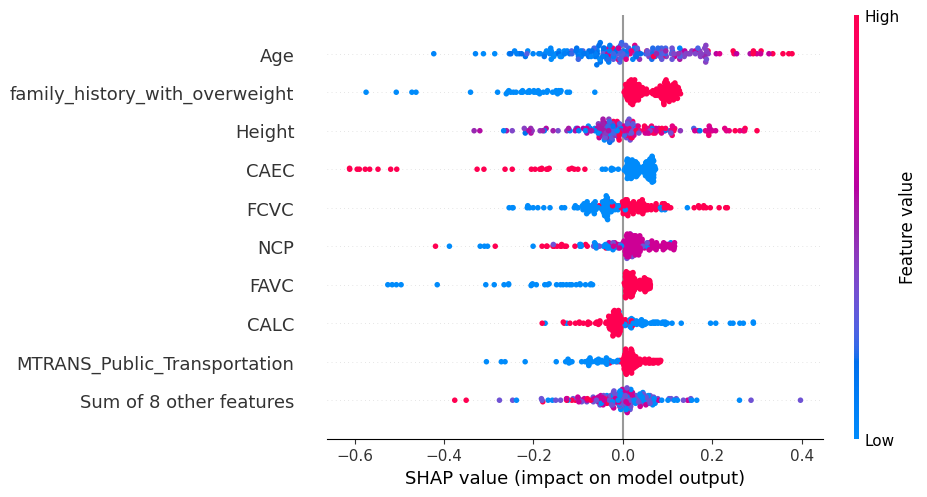

In [ ]:
# sv = Shapley Value
# exp = explainer
explainer = shap.Explainer(brf.predict, x_test_sample)
sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

Decision Tree

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


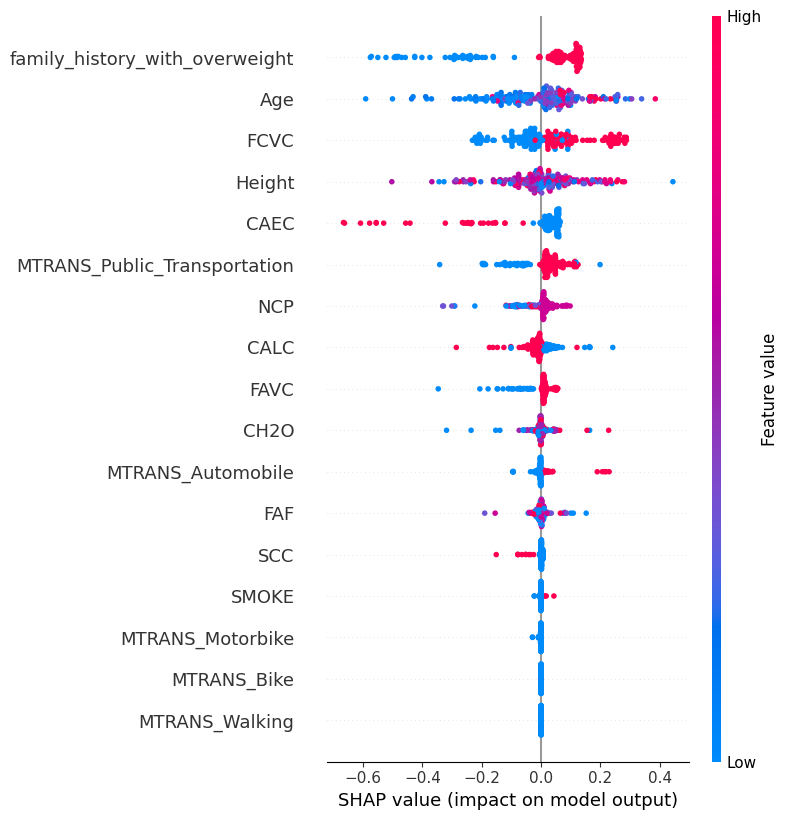

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 42).fit(x_train_hybrid, y_train_hybrid)

# create an explainer object
explainer = shap.TreeExplainer(model_dt)

# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test_hybrid.shape[0], size=200, replace=False)
x_test_sample = x_test_hybrid.iloc[sample_indices]

# calculate the shap values for the sample
shap_values = explainer.shap_values(x_test_sample)

# plot the shap summary plot
shap.summary_plot(shap_values[1], x_test_sample)

Beeswarm plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


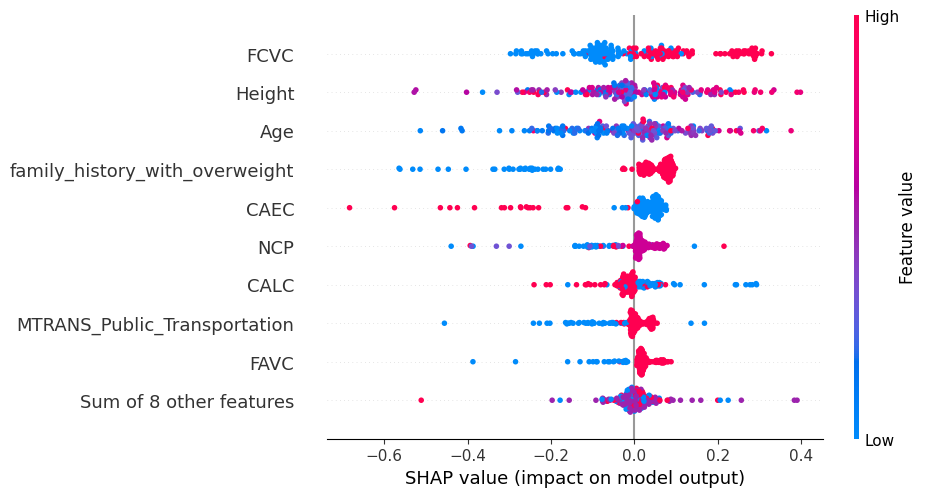

In [ ]:
# sv = Shapley Value
# exp = explainer
explainer = shap.Explainer(model_dt.predict, x_test_sample)
sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

XGBOOST Weighted

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


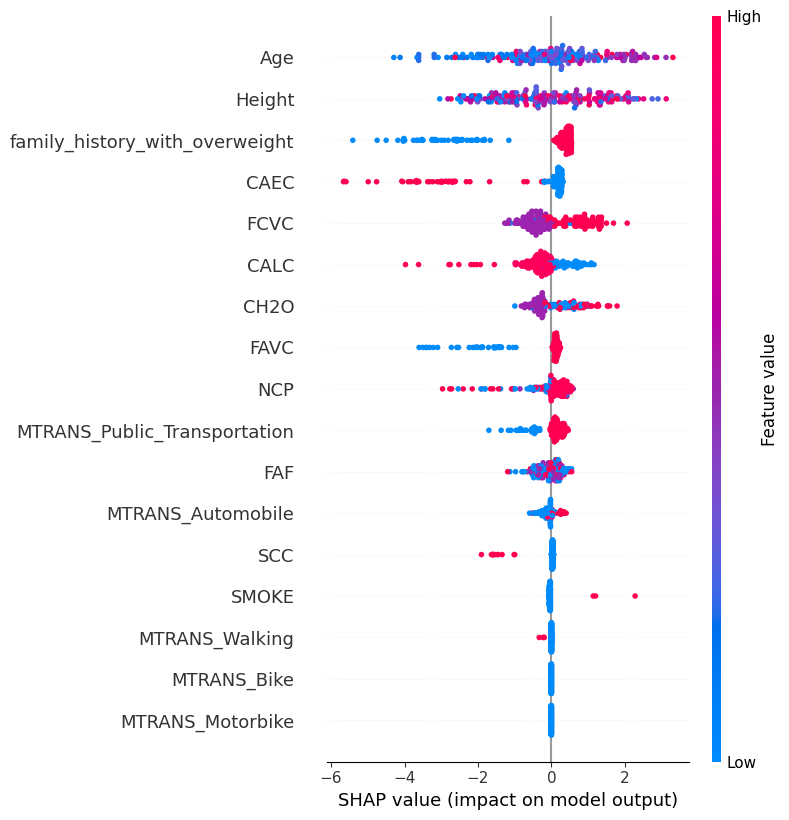

In [8]:
from xgboost import XGBClassifier
estimate = 217/122
xgb = XGBClassifier(booster = 'gbtree',
                    seed = 42,
                    scale_pos_weight = estimate)
xgb.fit(x_train_hybrid, y_train)

# create an explainer object
explainer = shap.TreeExplainer(xgb)

# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test_hybrid.shape[0], size=200, replace=False)
x_test_sample = x_test_hybrid.iloc[sample_indices]

# calculate the shap values for the sample
shap_values = explainer.shap_values(x_test_sample)

# plot the shap summary plot
shap.summary_plot(shap_values, x_test_sample)

In [ ]:
shap_values

array([[ 0.1398273 ,  0.08260351,  0.5209733 , ...,  0.        ,
         0.30951717,  0.00667244],
       [-0.60266006, -0.7466447 ,  0.5484603 , ...,  0.        ,
         0.42852917,  0.00665818],
       [-3.3164995 , -0.5512002 ,  0.41541332, ...,  0.        ,
         0.20175868,  0.00440024],
       ...,
       [ 0.34832096,  0.6812303 ,  0.44422466, ...,  0.        ,
        -0.80870444,  0.00746483],
       [ 0.22936763,  0.90721077,  0.555838  , ...,  0.        ,
         0.33522874,  0.00943176],
       [-2.4284463 , -0.96224105,  0.19786096, ...,  0.        ,
        -0.73945034,  0.0036475 ]], dtype=float32)

Permutation explainer: 201it [00:36,  4.92it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


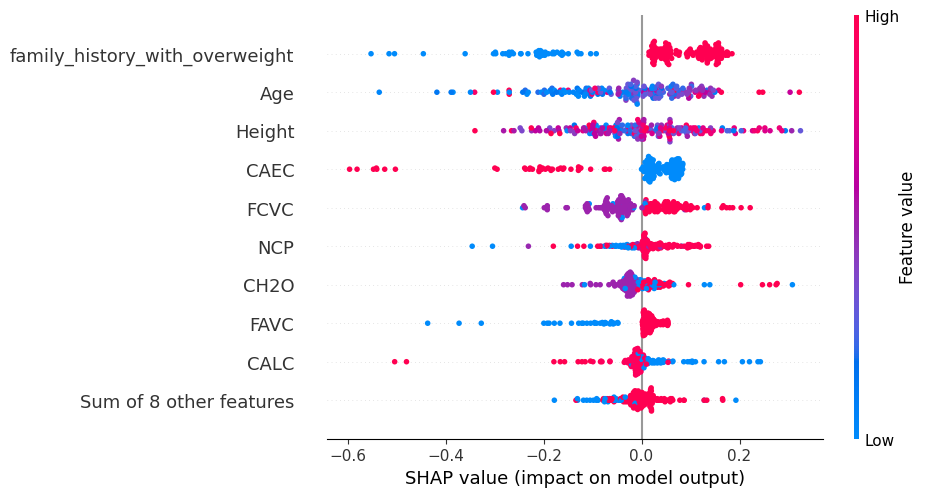

In [9]:
# sv = Shapley Value
# exp = explainer
explainer = shap.Explainer(xgb.predict, x_test_sample)
sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

LGBM

Using categorical_feature in Dataset.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


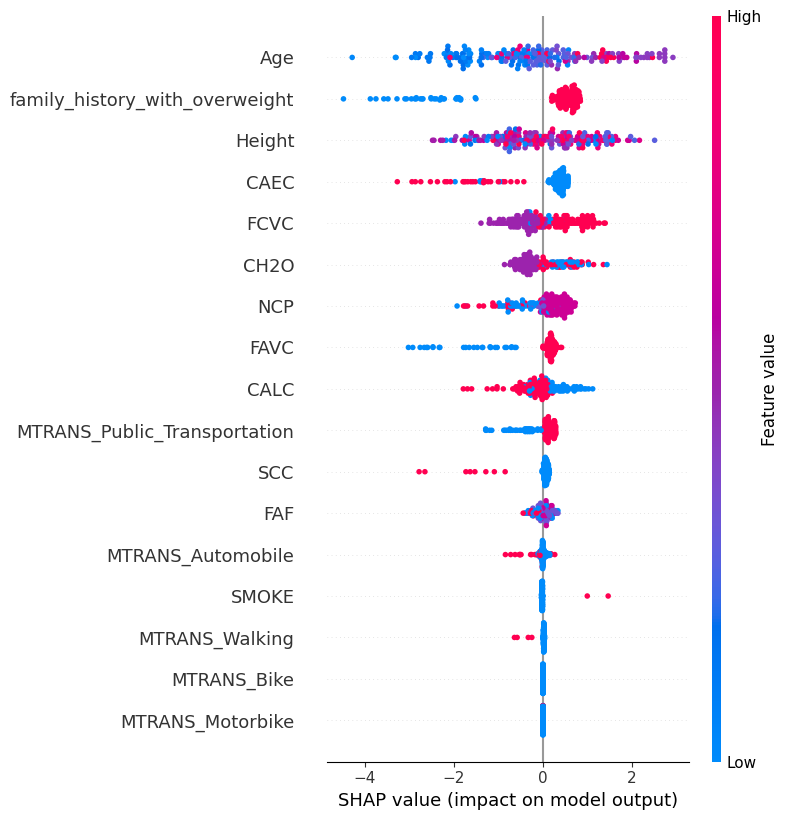

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state = 42,
                           scale_pos_weight = 217/122)
model.fit(x_train_hybrid, y_train,
          categorical_feature=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 
                               16]
          )

# create an explainer object
explainer = shap.TreeExplainer(model)

# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test_hybrid.shape[0], size=200, replace=False)
x_test_sample = x_test_hybrid.iloc[sample_indices]

# calculate the shap values for the sample
shap_values = explainer.shap_values(x_test_sample)

# plot the shap summary plot
shap.summary_plot(shap_values[1], x_test_sample)

Permutation explainer: 201it [00:46,  3.22it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


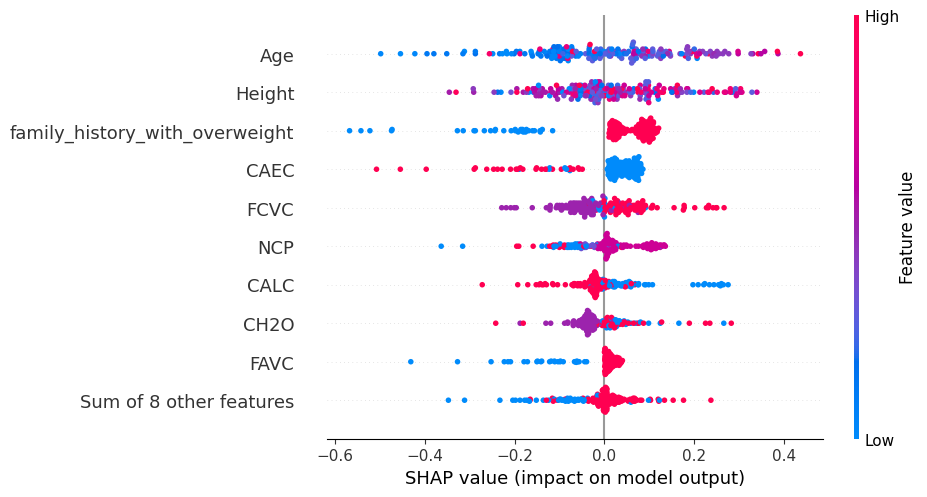

In [ ]:
# sv = Shapley Value
# exp = explainer
explainer = shap.Explainer(model.predict, x_test_sample)
sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)